In [2]:
require(data.table)
require(tidyverse)
options(repr.plot.width=4, repr.plot.height=3.5)
require(pheatmap)

## 1. load data

In [3]:
dat.pro_ps.smooth<- fread("../dat/1901/alpha_beta.promoter.long_100bin_transcripts_ps_smoothed.txt")
dat.pro_ps.raw <- fread("../dat/1901/alpha_beta.promoter.long_100bin_transcripts_ps_raw.txt")
head(dat.pro_ps.smooth)

bin,gene_tr.idx,percent_open,celltype
1,AAGAB_42733,0.5174754,alpha
2,AAGAB_42733,0.4584599,alpha
3,AAGAB_42733,0.4025329,alpha
4,AAGAB_42733,0.3496216,alpha
5,AAGAB_42733,0.2996535,alpha
6,AAGAB_42733,0.2525558,alpha


In [4]:
dat.pro_ps.wd <- dat.pro_ps.smooth%>%group_by(celltype)%>%spread(key = bin,value = percent_open)
head(dat.pro_ps.wd)
tail(dat.pro_ps.wd)
dim(dat.pro_ps.wd)
table(dat.pro_ps.wd$celltype)

gene_tr.idx,celltype,1,2,3,4,5,6,7,8,⋯,91,92,93,94,95,96,97,98,99,100
AAGAB_42733,alpha,0.517475430,0.4584599115,0.40253285,0.349621593,0.299653469,0.252555820,0.208255983,0.1666812969,⋯,20.073912,20.958403,21.861378,22.782948,23.723223,24.682317,25.660339,26.657403,27.673618,28.709097
AAMDC_22628,alpha,0.107309404,0.0905332797,0.07479448,0.060041427,0.046222515,0.033286159,0.021180767,0.0098547474,⋯,30.158963,31.859239,33.608425,35.406036,37.251593,39.144612,41.084613,43.071114,45.103632,47.181686
AATF_55762,alpha,0.052832477,0.0434042464,0.03464963,0.026548186,0.019079467,0.012223029,0.005958428,0.0002652184,⋯,14.783726,15.832790,16.920715,18.046729,19.210057,20.409928,21.645568,22.916203,24.221063,25.559372
ABCA2_129618,alpha,0.028167395,0.0230714302,0.01826746,0.013753604,0.009527968,0.005588668,0.001933818,-0.0014384706,⋯,5.266054,5.504649,5.747715,5.995334,6.247590,6.504564,6.766340,7.033000,7.304627,7.581303
ABCB1_117182,beta,0.003574929,0.0003861186,-0.00206902,-0.003813677,-0.004871042,-0.005264307,-0.005016662,-0.0041512974,⋯,4.321622,4.635768,4.963775,5.305248,5.659789,6.027000,6.406485,6.797846,7.200686,7.614609
ABCB10_11455,alpha,0.354779695,0.2989321545,0.24618759,0.196418305,0.149496610,0.105294810,0.063685213,0.0245401246,⋯,25.242513,26.504026,27.799714,29.129184,30.492040,31.887888,33.316332,34.776977,36.269429,37.793293


gene_tr.idx,celltype,1,2,3,4,5,6,7,8,⋯,91,92,93,94,95,96,97,98,99,100
ZSWIM5_3921,beta,0.905616254,0.72566900,0.55858973,0.40451444,0.26357912,0.13591975,0.02167233,-0.07902716,⋯,13.0153363,13.3237773,13.646680,13.9833003,14.3328942,14.6947175,15.0680261,15.4520761,15.8461232,16.2494233
ZSWIM7_53953,alpha,0.370445702,0.31089499,0.25486525,0.20221831,0.15281599,0.10652011,0.06319250,0.02269500,⋯,24.9517283,26.3641159,27.822880,29.3271461,30.8760387,32.4686831,34.1042041,35.7817270,37.5003765,39.2592779
ZSWIM8_14081,alpha,0.428704019,0.39152466,0.35625381,0.32279802,0.29106390,0.26095802,0.23238696,0.20525731,⋯,12.7607191,13.1105608,13.458927,13.8062725,14.1530512,14.4997176,14.8467259,15.1945304,15.5435854,15.8943452
ZZEF1_52562,alpha,3.628494909,3.83723216,4.03752532,4.22943972,4.41304069,4.58839357,4.75556369,4.91461637,⋯,0.1787657,0.1670852,0.157122,0.1490678,0.1431143,0.1394534,0.1382769,0.1397765,0.1441439,0.1515711
ZZEF1_52568,alpha,-0.003552642,-0.00771986,-0.01138294,-0.01451242,-0.01707885,-0.01905275,-0.02040468,-0.02110516,⋯,16.3651026,17.3965361,18.460209,19.5557453,20.6827691,21.8409044,23.0297752,24.2490056,25.4982196,26.7770413
ZZZ3_5178,alpha,0.553389422,0.49684720,0.44360701,0.39353162,0.34648381,0.30232635,0.26092201,0.22213357,⋯,33.9751645,35.6904905,37.454158,39.2656008,41.1242532,43.0295489,44.9809220,46.9778065,49.0196364,51.1058456


[1] 3219  102


alpha  beta 
 2315   904 

## 2. updated cluster 
[QuickR](https://www.statmethods.net/advstats/cluster.html) introduces the following methods categories:
1. Partitioning based methods or Centroid-based clustering: `kmeans`, `pam`
2. Hierarchical Agglomerative: `hclust`, `pvclust`
3. Model based: `mclust`
4. Density-based: [`DBSCAN`](https://en.wikipedia.org/wiki/DBSCAN)

More complete intro can be found [cluster analysis@WIKI](https://en.wikipedia.org/wiki/Cluster_analysis)
Also they introduced:
1. cluster compare: `fpc::cluster.stats`

Because the goal is to find dynamical patterns, I would like to choose 1. (i.e. kmeans or pam)


In [5]:
require(fpc)
dat.sub <- dat.pro_ps.wd%>%
    as.data.frame()%>%
    filter(celltype=='alpha')%>%
    column_to_rownames("gene_tr.idx")%>%
    select(-celltype)

Loading required package: fpc


### scale vs no scale

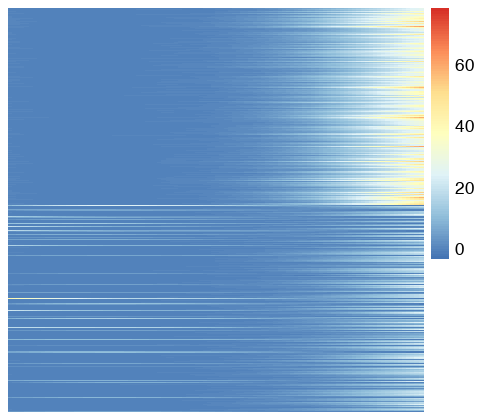

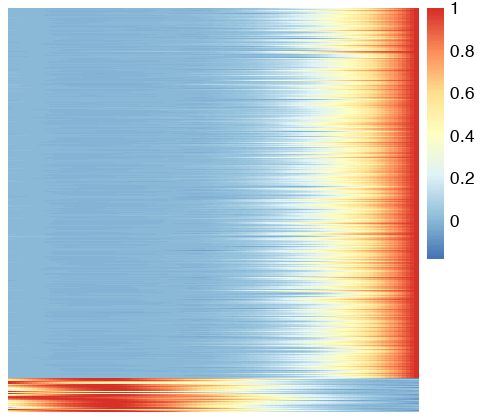

In [54]:
options(repr.plot.width=4, repr.plot.height=3.5)
require(pheatmap)

pheatmap(dat.sub.2[order(pk$pamobject$clustering),],scale="none",cluster_rows = F,cluster_cols = F,
         show_rownames = F,show_colnames = F)
pheatmap(dat.sub.scale.2[order(pk.scale$pamobject$clustering),],scale="none",cluster_rows = F,cluster_cols = F,
         show_rownames = F,show_colnames = F)

### 2.2 filter bottom < 5% 

tr.keep
FALSE  TRUE 
  129  2186 

2  clusters  0.9072799 
3  clusters  0.5175601 
4  clusters  0.4797896 
5  clusters  0.4751077 
6  clusters  0.443044 
7  clusters  0.3966925 
8  clusters  0.3843913 
9  clusters  0.3549122 
10  clusters  0.3340442 



   1    2 
2033  153 

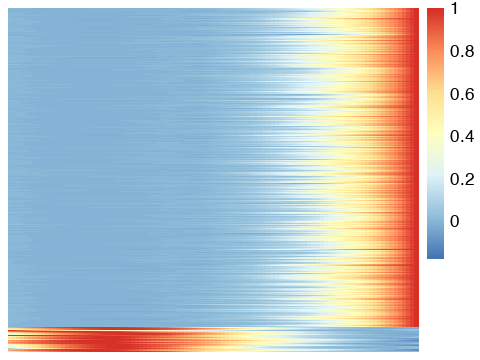

In [6]:
tr.keep <- apply(dat.sub,1,max)>=5
table(tr.keep)
dat.sub.2 <- dat.sub[tr.keep,]
dat.sub.2.scale <- t(apply(dat.sub.2,1,function(x) x/max(x)))
pk.scale<- pamk(dat.sub.2.scale,critout=T)
options(repr.plot.width=4, repr.plot.height=3)
table(pk.scale$pamobject$clustering)
pheatmap(dat.sub.2.scale[order(pk.scale$pamobject$clustering),],scale="none",cluster_rows = F,cluster_cols = F,
         show_rownames = F,show_colnames = F)

2  clusters  0.5008436 
3  clusters  0.4622058 
4  clusters  0.4277294 
5  clusters  0.3778902 
6  clusters  0.3528251 
7  clusters  0.3329682 
8  clusters  0.3239469 
9  clusters  0.3046382 
10  clusters  0.2804791 

   1    2 
 872 1161 
2  clusters  0.6466653 
3  clusters  0.3484952 
4  clusters  0.3110124 
5  clusters  0.2880644 
6  clusters  0.3109866 
7  clusters  0.2822817 
8  clusters  0.2984364 
9  clusters  0.2997004 
10  clusters  0.2979984 

  1   2 
124  29 


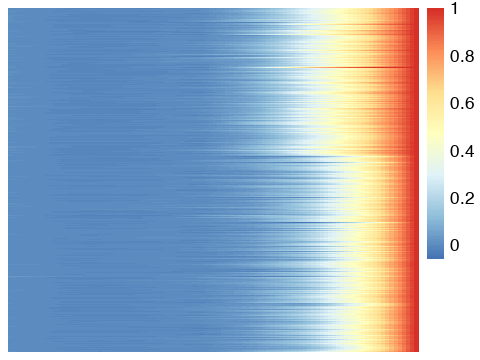

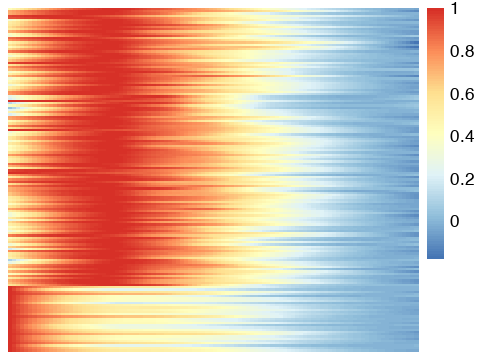

In [7]:
pk.scale.2 <- list()
for(i in 1:2){
    #cat(paste0("For Cluster ",i,"\n"))
    dat.sub.2.scale.1 <- dat.sub.2.scale[pk.scale$pamobject$clustering==i,]
    pk.scale.2[[i]]<- pamk(dat.sub.2.scale.1,critout=T)
    print(table(pk.scale.2[[i]]$pamobject$clustering))
    pheatmap(dat.sub.2.scale.1[order(pk.scale.2[[i]]$pamobject$clustering),],
         border_color = NA,scale="none",cluster_rows = F,cluster_cols = F,
         show_rownames = F,show_colnames = F)
}

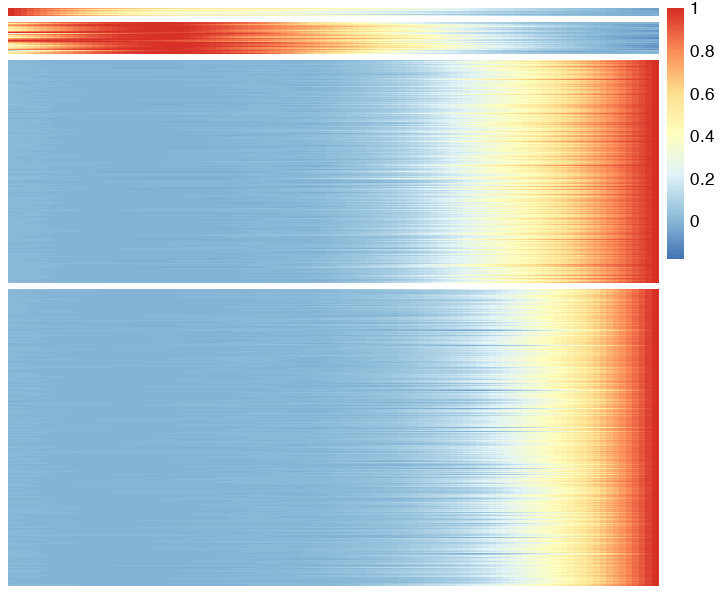

In [8]:
# 
a=(pk.scale.2[[1]]$pamobject$clustering)
b1=ifelse(a==1,3,4)
names(b1)=names(a)

a=(pk.scale.2[[2]]$pamobject$clustering)
b2=ifelse(a==1,2,1)
names(b2)=names(a)


final.ord = c(b1,b2)


options(repr.plot.width=6, repr.plot.height=5)

pheatmap(dat.sub.2.scale[names(final.ord)[order(final.ord)],],
         gaps_row = as.numeric(cumsum(table(final.ord))),
         scale="none",cluster_rows = F,cluster_cols = F,
         show_rownames = F,show_colnames = F)

In [10]:
table(final.ord)

final.ord
   1    2    3    4 
  29  124  872 1161 

In [11]:
pk.list<-sapply(1:4,function(x)
        unique(unlist(sapply(names(which(final.ord==x)), function(y) 
            unlist(strsplit(y,split = "_"))[1]))))
str(pk.list)

## go enrich                             
require(enrichR)
dbs <- listEnrichrDbs()                 
pk.list.gene.enrichr <- lapply(pk.list,function(x) 
    enrichr(x, c("GO_Biological_Process_2018"))$GO_Biological_Process_2018)

List of 4
 $ : chr [1:29] "AK5" "AQP7" "ARRDC3" "BACE1" ...
 $ : chr [1:118] "ABCC8" "ABLIM2" "ADCK1" "ADCK3" ...
 $ : chr [1:861] "AAGAB" "ABCA2" "ABHD10" "ABHD5" ...
 $ : chr [1:1138] "AAMDC" "AATF" "ABCB10" "ABCB9" ...


Loading required package: enrichR


Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.


In [12]:

saveRDS(object = list(pd.hm = dat.sub.2.scale[names(final.ord)[order(final.ord)], 
    ], pd.ord = final.ord[order(final.ord)], pd.enrichr.res = pk.list.gene.enrichr), 
    file = "../dat/figdata/fig2_prom_alpha_ps.Rds")

2  clusters  0.5008436 
3  clusters  0.4622058 
4  clusters  0.4277294 
5  clusters  0.3778902 
6  clusters  0.3528251 
7  clusters  0.3329682 
8  clusters  0.3239469 
9  clusters  0.3046382 
10  clusters  0.2804791 



   1    2 
 872 1161 

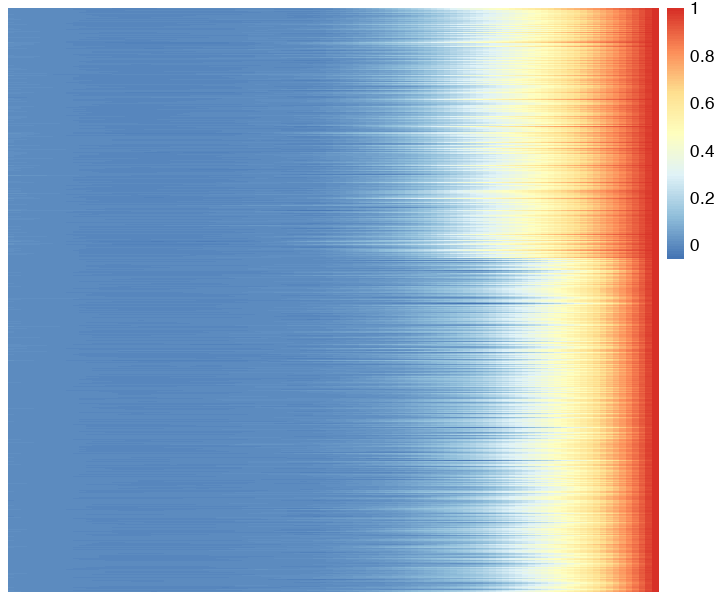

In [9]:
dat.sub.2.scale.1 <- dat.sub.2.scale[pk.scale$pamobject$clustering==1,]
pk.scale.1<- pamk(dat.sub.2.scale.1,critout=T)
table(pk.scale.1$pamobject$clustering)
pheatmap(dat.sub.2.scale.1[order(pk.scale.1$pamobject$clustering),],
         border_color = NA,scale="none",cluster_rows = F,cluster_cols = F,
         show_rownames = F,show_colnames = F)

In [ ]:
glist.a1<- list()
glist.a1$c1<- unique(as.character(sapply(names(which(pk.scale.1$pamobject$clustering==1)),function(x) unlist(strsplit(x,split = "_"))[1])))
glist.a1$c2<- unique(as.character(sapply(names(which(pk.scale.1$pamobject$clustering==2)),function(x) unlist(strsplit(x,split = "_"))[1])))
t(lapply(glist.a1,length))

In [ ]:
dat.sub.2.scale.2 <- dat.sub.2.scale[pk.scale$pamobject$clustering==2,]
pk.scale.2<- pamk(dat.sub.2.scale.2,critout=T)
table(pk.scale.2$pamobject$clustering)
pheatmap(dat.sub.2.scale.2[order(pk.scale.2$pamobject$clustering),],
         border_color = NA,scale="none",cluster_rows = F,cluster_cols = F,
         show_rownames = F,show_colnames = F)

In [ ]:
glist.a2<- list()
glist.a2$c1<- unique(as.character(sapply(names(which(pk.scale.2$pamobject$clustering==1)),function(x) unlist(strsplit(x,split = "_"))[1])))
glist.a2$c2<- unique(as.character(sapply(names(which(pk.scale.2$pamobject$clustering==2)),function(x) unlist(strsplit(x,split = "_"))[1])))
#glist.a2        
t(lapply(glist.a2,length))

In [27]:
require(enrichR)
dbs <- listEnrichrDbs()
dbs%>% filter(grepl('KEGG',libraryName) | grepl("GO_Biological_Process",libraryName))
glist.a2.enrichr<-glist.a1.enrichr <- list()
for(i in c("c1","c2")){
    glist.a1.enrichr[[i]] <- enrichr(glist.a1[[i]], c("GO_Biological_Process_2018","KEGG_2016"))
    glist.a2.enrichr[[i]] <- enrichr(glist.a2[[i]], c("GO_Biological_Process_2018","KEGG_2016"))
}

libraryName,numTerms,geneCoverage,genesPerTerm,link
KEGG_2013,200,4128,48,http://www.kegg.jp/kegg/download/
GO_Biological_Process_2015,5192,14264,58,http://www.geneontology.org/GO.downloads.annotations.shtml
GO_Biological_Process_2013,941,7682,78,http://www.geneontology.org/GO.downloads.annotations.shtml
KEGG_2015,179,3800,48,http://www.kegg.jp/kegg/download/
KEGG_2016,293,7010,87,http://www.kegg.jp/kegg/download/
GO_Biological_Process_2017,3166,13822,21,http://www.geneontology.org/
GO_Biological_Process_2017b,10125,13247,49,http://www.geneontology.org/
GO_Biological_Process_2018,5103,14433,36,http://www.geneontology.org/


Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
  Querying KEGG_2016... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
  Querying KEGG_2016... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
  Querying KEGG_2016... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
  Querying KEGG_2016... Done.
Parsing results... Done.


In [29]:
head(glist.a1.enrichr$c1$GO_Biological_Process_2018%>%arrange(Adjusted.P.value))
head(glist.a1.enrichr$c2$GO_Biological_Process_2018%>%arrange(Adjusted.P.value))
# a2
head(glist.a2.enrichr$c1$GO_Biological_Process_2018%>%arrange(Adjusted.P.value))
head(glist.a2.enrichr$c2$GO_Biological_Process_2018%>%arrange(Adjusted.P.value))

Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
phosphorylation (GO:0016310),36/387,1.283171e-05,0.02558311,0.0001101980,0.1649542,-1.725689,19.43745,DGKE;ROCK2;STK39;PPP4R1;AKT3;TLK2;PIM1;TLK1;MAPK1;MAP4K5;NADK;MAP3K5;MAP4K4;CDK17;TNK2;PRKCE;LMTK2;PRKCA;DGKZ;TGFBR2;CDK8;GNPTG;BMP2;SNRK;PIK3CA;WNK1;STK17A;PEAK1;TOLLIP;MAPKAPK2;SIK3;PKN2;TOP1;TNIK;SGK1;CDK13
"positive regulation of transcription, DNA-templated (GO:0045893)",77/1121,3.267319e-05,0.02558311,0.0003950882,0.1649542,-1.711188,17.67478,FOXA1;RB1;DDX3X;LDB1;RORA;CTCF;NR3C1;PKD2;GLI3;ELK4;PSMD9;FLCN;ZNF609;TRIM28;SIN3A;ZMIZ1;ZC3H12A;HEY2;EPC1;IER5;TEAD1;ATXN7L3;HRAS;MAP3K5;NCOA1;UTP15;NCOA4;AXIN1;PROX1;SOX12;FOS;POU3F1;ARID1B;NPAS4;ZNF639;DDIT3;RFX5;MET;SQSTM1;RHOQ;SMARCD1;DDX5;DHX9;SRF;RAI1;NUP85;EPCAM;TP53INP2;UBC;TP53INP1;ZNF821;E2F5;BPTF;BRD4;ESRRA;ZFHX3;SMAD4;JUND;TAF15;HMGA1;GRHL1;MEIS2;BMP6;FOSL2;MAD2L2;NR4A1;CDK8;BMP2;NFIA;MAFF;SNAI1;CTNNB1;TAF4B;NAA16;MMS19;CDK13;SSBP3
regulation of transcription from RNA polymerase II promoter (GO:0006357),96/1479,3.226425e-05,0.02558311,0.0004740063,0.1649542,-1.375625,14.22610,FOXA1;RB1;CDKN1A;DDX3X;LDB1;RORA;CTCF;NR3C1;BMI1;PKD2;GLI3;ELK4;YY1;FOXQ1;FLCN;ZNF609;SIN3A;ZMIZ1;ZC3H12A;HEY2;EPC1;EPC2;IER5;TEAD1;HRAS;DACT1;NCOA1;USP2;PROX1;SOX12;FOS;POU3F2;MED26;FOXP1;NPAS4;DUSP22;ZNF639;DDIT3;RFX5;ANKRA2;MET;SQSTM1;JDP2;RHOQ;SMARCD1;DDX5;DHX9;SRF;DDX20;MTDH;DLL4;RAI1;EPCAM;CREG1;UBC;ZNF821;E2F5;SKIL;E2F6;ZBED4;BPTF;BRD4;ESRRA;ABCA2;ZFHX3;SMAD4;JUND;SMURF2;BMP8A;HMGA1;DEK;GRHL1;SOD2;MEIS2;BMP6;MED13L;FOSL2;TARBP1;GATAD2A;PER2;MAD2L2;NR4A1;CDK8;BMP2;NFIA;CNOT2;BHLHE40;MAFF;SNAI1;FOSB;CTNNB1;TAF4B;TRIM37;CDK13;KIAA1958;SSBP3
protein modification by small protein conjugation (GO:0032446),36/399,2.480690e-05,0.02558311,0.0001917281,0.1649542,-1.140616,12.09554,KLHL18;HIST1H2BN;VCP;RNF11;PCNA;HIST1H2BJ;HIST1H2BK;DCUN1D1;UBR3;ARRB2;UBE2Z;HERC5;ZNRF1;HERC3;HECTD1;TRIM28;NUP85;RNF138;HECTD4;UBC;NUP43;ATG3;RNF44;SMURF2;FBXW7;MSL2;NUP153;COMMD1;KLHL5;NUP35;FBXL3;TRIP12;NUP54;TOP1;FBXL5;RNF220
protein ubiquitination (GO:0016567),42/507,4.123612e-05,0.02583031,0.0003181212,0.1649542,-1.094309,11.04835,KLHL18;HIST1H2BN;VCP;RNF11;PCNA;HIST1H2BJ;PSMD13;HIST1H2BK;UBR3;ARRB2;FBXO21;UBE2Z;HERC5;PSMD9;ZNRF1;HERC3;HECTD1;RNF138;HECTD4;UBC;PSMD1;UNKL;ATG3;RNF44;ANKIB1;SMURF2;FBXW7;SIAH1;MSL2;COMMD1;FBXL13;FBXL14;ABTB2;RNF145;KLHL5;MKRN1;FBXL3;TRIM37;TRIP12;FBXL5;RNF166;RNF220
proteasome-mediated ubiquitin-dependent protein catabolic process (GO:0043161),28/292,6.780573e-05,0.02654594,0.0004005444,0.1649542,-1.304218,12.51901,VCP;RNF11;PSMD13;UBXN2A;UBR3;ARRB2;BAG6;PSMD9;ZNRF1;UCHL1;HECTD4;UBC;PSMD1;RNF44;SMURF2;FBXW7;SIAH1;AXIN1;YOD1;ABTB2;NSFL1C;RNF145;DDIT3;CTNNB1;FBXL3;STT3B;FBXL5;ANAPC1


Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
"transcription, DNA-templated (GO:0006351)",47/357,7.153028e-08,0.0002295407,1.590660e-06,0.005104428,-1.882552,30.97390,GTF3C2;NFAT5;GMEB2;GTF3C4;CBFB;KMT2A;EPAS1;RSF1;RTF1;YBX1;FOXO3;PWP1;TAF5L;MNT;POLR2A;SNAPC2;TRIM29;DVL1;HSF1;E2F1;LEO1;UBTF;NELFA;ZNF148;POLR2L;KLF11;ZFHX3;ECD;NFATC3;KLF4;MEIS2;ILF2;HIPK3;FOSL1;MAF;TADA2A;FUBP3;COPS2;POLR1C;MED20;CEBPZ;TAF5;PTMA;TAF3;NFE2L1;CREB5;ATF4
"regulation of transcription, DNA-templated (GO:0006355)",130/1599,1.855937e-05,0.0119114014,2.465265e-04,0.132359581,-1.831854,19.95719,ZNF571;SMARCB1;EHMT1;PRDM2;GPATCH3;BACH1;UBE2L3;KAT5;ZNF84;SCMH1;ZNF207;JUNB;PITX3;PIAS4;HES6;SMARCC1;MAP2K1;ZGPAT;FBXW11;ILF2;HIC1;PIAS1;KARS;THAP7;DGKQ;ATF3;ZNF674;ATF4;L3MBTL1;KHDRBS1;CASZ1;ZNF274;CBFB;KMT2A;CTBP1;EPAS1;FOXO6;FOXO3;ZBTB4;DEDD2;PHF21B;SBNO1;ZNHIT3;DVL1;ZNF148;PPARGC1A;ZBTB7A;ZNF540;ZFHX3;XRCC6;SMAD4;SMAD3;UBE2I;DENND4A;NFATC3;INHBA;SMAD5;NFKB2;FOSL1;CNOT7;TADA2A;FUBP3;COPS2;RFXAP;CNOT8;NFE2L1;FANK1;RNF10;GMEB2;CHD7;FHL2;BHLHE41;RSF1;YBX1;AATF;CHMP1A;UIMC1;UBTF;JARID2;CIC;ZNF367;YWHAH;BRD3;KLF11;ZHX2;TGIF2;FOXD1;TCF12;ETV6;SLTM;CTDSP1;CRY2;MED20;RARA;CRY1;TERF2IP;MAPRE3;CREB5;HDAC5;MYCBP;CEBPG;FOXK2;LIN9;RELA;CUX1;POLR2A;NFIL3;CCDC85B;ELMSAN1;NSD1;UBN1;E2F1;HSF4;ZIM2;POLR2L;SPEN;FOXJ3;FOXJ1;ZNF76;ELP3;KLF4;MAPK14;HNRNPAB;TBX3;CENPF;RYBP;FOSB;QRICH1;TAF3;CDK5R1
regulation of G2/M transition of mitotic cell cycle (GO:0010389),23/150,1.328933e-05,0.0119114014,1.013998e-04,0.116222321,-1.771173,19.88770,PSMD12;PSMD11;ODF2;SSNA1;RCC2;HAUS3;CDC7;HMMR;DYNLL1;TUBG1;CKAP5;RAB11A;PSMA5;CENPF;PSMA3;PSMA1;HAUS8;UBB;PSMB3;PSME3;PSMD3;DTL;PAFAH1B1
"negative regulation of transcription, DNA-templated (GO:0045892)",76/814,1.412519e-05,0.0119114014,1.448705e-04,0.116222321,-1.762953,19.68787,TCF25;FHL2;BHLHE41;EHMT1;RSF1;BACH1;KAT5;SCMH1;CHMP1A;UIMC1;WWC3;JARID2;CIC;JUNB;PIAS4;KLF11;ZHX2;TGIF2;ZGPAT;FOXD1;FBXW11;HIC1;ETV6;THAP7;CRY2;RARA;CRY1;ATF3;ZNF674;L3MBTL1;KHDRBS1;HDAC5;CTBP1;RTF1;FOXO3;ZBTB4;RELA;RELB;DEDD2;MNT;RXRA;CUX1;UBB;NFIL3;CCDC85B;NSD1;HSF1;ORC2;E2F1;BEND3;ZNF148;FNIP2;ZBTB7A;SPEN;CBX8;ZNF540;PLK3;ZFHX3;XRCC6;SMAD4;SMAD3;UBE2I;PTCH1;PDE2A;FOXJ1;KLF4;MEIS2;TBX3;NFKB2;CENPF;CNOT7;COPS2;DNAJA3;FOSB;TAF3;CDK5R1
protein modification by small protein removal (GO:0070646),33/262,1.578176e-05,0.0119114014,1.204395e-04,0.116222321,-1.224513,13.53902,BECN1;PSMD12;PSMD11;TNFAIP3;FOXK2;ACTB;SNX3;SENP5;UBB;PSMB3;PSMD3;UIMC1;SMAD4;SMAD3;MBD6;ACTR5;STAM;INO80;JOSD1;PSMA5;MAVS;COPS6;PSMA3;PSMA1;HGS;TRAF3;COPS2;PSME3;ASXL2;STAMBP;BIRC2;BAP1;OTUD3
regulation of transcription from RNA polymerase II promoter (GO:0006357),121/1479,2.798766e-05,0.0149687319,3.299709e-04,0.132359581,-1.371982,14.38352,SMARCB1;MAML1;PRDM2;BACH1;KAT5;WWC3;JUNB;SMARCC1;ZGPAT;EBF4;HIC1;DGKQ;GPRIN1;ATF3;ATF4;CBFB;KMT2A;CTBP1;EPAS1;FOXO6;RTF1;FOXO3;ZBTB4;FAM83G;UBB;ORC2;CAMTA1;ZNF821;ZNF148;PPARGC1A;CBX8;PLK3;ZFHX3;XRCC6;SMAD4;SMAD3;UBE2I;PTCH1;PDE2A;ECD;NFATC3;INO80;INHBA;SMAD5;NFKB2;FOSL1;MAVS;CNOT7;TADA2A;FUBP3;AGO2;CDK12;NFE2L1;RNF10;GMEB2;TCF25;PTPRN;FHL2;BHLHE41;YBX1;TRIAP1;AATF;HYAL2;CIC;ZNF367;NCK1;KDM6B;BRD3;KLF11;ZHX2;TGIF2;FOXD1;TCF12;ETV6;CREB3;SLTM;CTDSP1;CRY2;MED20;RARA;CRY1;NFAT5;HDAC5;NUFIP1;CEBPG;DOT1L;FOXK2;LIN9;RELA;RELB;MNT;RXRA;CUX1;NFIL3;ELMSAN1;NSD1;HSF1;UBN1;E2F1;HSF4;LEO1;BEND3;FNIP2;AAMDC;SPEN;CDKN2B;FOXJ3;FOXJ1;ZNF76;ELP3;KLF4;MAPK14;MEIS2;TBX3;DNAJA3;ASXL2;FOSB;QRICH1;CEBPZ;TAF3;LPIN2


Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
regulation of protein secretion (GO:0050708),7/108,3.546415e-06,0.002418655,4.461219e-06,0.003042552,-1.270394,15.94290,NEUROD1;RFX6;RSAD2;ABCC8;GCG;SYT7;LLGL2
regulation of insulin secretion (GO:0050796),6/99,2.660242e-05,0.009071425,3.191875e-05,0.010884294,-1.298500,13.67906,NEUROD1;SLC30A8;RFX6;ABCC8;GCG;SYT7
regulation of peptide hormone secretion (GO:0090276),5/74,7.642934e-05,0.017374936,9.264959e-05,0.021062340,-1.840800,17.44920,NEUROD1;RFX6;ABCC8;GCG;SYT7
negative regulation of secretion by cell (GO:1903531),3/31,7.977143e-04,0.119550067,9.825306e-04,0.145972126,-1.888822,13.47440,CHGA;GRM7;RSAD2
positive regulation of insulin secretion (GO:0032024),3/32,8.764668e-04,0.119550067,1.070177e-03,0.145972126,-1.706492,12.01304,SLC30A8;RFX6;GCG
regulation of cardiac muscle contraction (GO:0055117),3/36,1.240227e-03,0.140972514,1.469652e-03,0.167050471,-2.078881,13.91283,CHGA;ANK2;ATP1B1


Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
nucleotide phosphorylation (GO:0046939),1/9,0.01297715,0.1341988,0.01443869,0.1433474,-3.625474,15.75111,AK5
nucleobase metabolic process (GO:0009112),1/7,0.01010746,0.1341988,0.01156693,0.1433474,-3.378140,15.52080,TTR
nucleoside diphosphate metabolic process (GO:0009132),1/8,0.01154331,0.1341988,0.01300381,0.1433474,-3.466622,15.46685,AK5
nucleoside phosphate biosynthetic process (GO:1901293),1/10,0.01440897,0.1341988,0.01587159,0.1433474,-3.408740,14.45273,AK5
nucleoside diphosphate phosphorylation (GO:0006165),1/9,0.01297715,0.1341988,0.01443869,0.1433474,-3.191693,13.86652,AK5
nucleoside triphosphate biosynthetic process (GO:0009142),1/10,0.01440897,0.1341988,0.01587159,0.1433474,-3.261256,13.82741,AK5


In [30]:
head(glist.a2.enrichr$c2$KEGG_2016%>%arrange(Adjusted.P.value))

Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
Proteoglycans in cancer_Homo sapiens_hsa05205,3/203,0.003099351,0.1604856,0.005722805,0.2543220,-2.0133369,11.630167,PXN;PTPN6;CAMK2G
Insulin secretion_Homo sapiens_hsa04911,2/85,0.006727097,0.1604856,0.010829126,0.2543220,-1.8742211,9.374126,CAMK2G;GCK
Glucagon signaling pathway_Homo sapiens_hsa04922,2/101,0.009380740,0.1604856,0.014954425,0.2543220,-1.8323814,8.555566,CAMK2G;GCK
Carbon metabolism_Homo sapiens_hsa01200,2/113,0.011629393,0.1604856,0.018429131,0.2543220,-1.6087476,7.165715,MDH2;GCK
Butirosin and neomycin biosynthesis_Homo sapiens_hsa00524,1/5,0.007229726,0.1604856,0.011059014,0.2543220,-0.7881639,3.885297,GCK
Wnt signaling pathway_Homo sapiens_hsa04310,2/142,0.017928195,0.2061742,0.028085785,0.2729117,-1.7525368,7.047617,CTBP2;CAMK2G


In [80]:
# a1.c1
head(glist.a1.enrichr$c1$GO_Biological_Process_2018%>%arrange(desc(Combined.Score)))
head(glist.a1.enrichr$c1$GO_Biological_Process_2018%>%arrange(Adjusted.P.value))
head(glist.a1.enrichr$c1$KEGG_2016%>%arrange(desc(Combined.Score)))
head(glist.a1.enrichr$c1$KEGG_2016%>%arrange(Adjusted.P.value))

Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
regulation of organ growth (GO:0046620),2/10,1.51e-03,0.14672,2.10e-03,0.19136,-2.91,18.9,WWC1;SLC6A4
positive regulation of insulin secretion involved in cellular response to glucose stimulus (GO:0035774),2/11,1.83e-03,0.15630,2.48e-03,0.19136,-2.79,17.6,RFX6;GCG
regulation of peptide hormone secretion (GO:0090276),5/74,7.64e-05,0.01737,9.26e-05,0.02106,-1.84,17.4,NEUROD1;RFX6;ABCC8;GCG;SYT7
regulation of protein secretion (GO:0050708),7/108,3.55e-06,0.00242,4.46e-06,0.00304,-1.27,15.9,NEUROD1;RFX6;RSAD2;ABCC8;GCG;SYT7;LLGL2
positive regulation of potassium ion transmembrane transporter activity (GO:1901018),2/13,2.58e-03,0.15997,3.31e-03,0.19136,-2.61,15.5,ANK2;ATP1B1
cellular response to fluid shear stress (GO:0071498),2/13,2.58e-03,0.15997,3.31e-03,0.19136,-2.45,14.6,MTSS1;SREBF2


Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
regulation of protein secretion (GO:0050708),7/108,3.55e-06,0.00242,4.46e-06,0.00304,-1.27,15.9,NEUROD1;RFX6;RSAD2;ABCC8;GCG;SYT7;LLGL2
regulation of insulin secretion (GO:0050796),6/99,2.66e-05,0.00907,3.19e-05,0.01088,-1.30,13.7,NEUROD1;SLC30A8;RFX6;ABCC8;GCG;SYT7
regulation of peptide hormone secretion (GO:0090276),5/74,7.64e-05,0.01737,9.26e-05,0.02106,-1.84,17.4,NEUROD1;RFX6;ABCC8;GCG;SYT7
negative regulation of secretion by cell (GO:1903531),3/31,7.98e-04,0.11955,9.83e-04,0.14597,-1.89,13.5,CHGA;GRM7;RSAD2
positive regulation of insulin secretion (GO:0032024),3/32,8.76e-04,0.11955,1.07e-03,0.14597,-1.71,12.0,SLC30A8;RFX6;GCG
regulation of cardiac muscle contraction (GO:0055117),3/36,1.24e-03,0.14097,1.47e-03,0.16705,-2.08,13.9,CHGA;ANK2;ATP1B1


Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
Maturity onset diabetes of the young_Homo sapiens_hsa04950,2/26,0.0102,0.666,0.0124,0.685,-1.84,8.43,NEUROD1;RFX6
Insulin secretion_Homo sapiens_hsa04911,3/85,0.0139,0.666,0.0162,0.685,-1.87,8.01,ABCC8;GCG;ATP1B1
Serotonergic synapse_Homo sapiens_hsa04726,3/112,0.0287,0.666,0.0325,0.685,-1.83,6.50,DDC;HTR1F;SLC6A4
Type II diabetes mellitus_Homo sapiens_hsa04930,2/48,0.0326,0.666,0.0370,0.685,-1.86,6.36,MAPK10;ABCC8
Hippo signaling pathway_Homo sapiens_hsa04390,3/153,0.0621,0.666,0.0689,0.685,-1.64,4.56,DLG2;WWC1;LLGL2
Adipocytokine signaling pathway_Homo sapiens_hsa04920,2/70,0.0643,0.666,0.0710,0.685,-1.66,4.55,MAPK10;PPARGC1A


Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
Maturity onset diabetes of the young_Homo sapiens_hsa04950,2/26,0.0102,0.666,0.0124,0.685,-1.84,8.43,NEUROD1;RFX6
Insulin secretion_Homo sapiens_hsa04911,3/85,0.0139,0.666,0.0162,0.685,-1.87,8.01,ABCC8;GCG;ATP1B1
Serotonergic synapse_Homo sapiens_hsa04726,3/112,0.0287,0.666,0.0325,0.685,-1.83,6.50,DDC;HTR1F;SLC6A4
Type II diabetes mellitus_Homo sapiens_hsa04930,2/48,0.0326,0.666,0.0370,0.685,-1.86,6.36,MAPK10;ABCC8
Hippo signaling pathway_Homo sapiens_hsa04390,3/153,0.0621,0.666,0.0689,0.685,-1.64,4.56,DLG2;WWC1;LLGL2
Adipocytokine signaling pathway_Homo sapiens_hsa04920,2/70,0.0643,0.666,0.0710,0.685,-1.66,4.55,MAPK10;PPARGC1A


In [81]:
# a1.c2
head(glist.a1.enrichr$c2$GO_Biological_Process_2018%>%arrange(desc(Combined.Score)))
head(glist.a1.enrichr$c2$GO_Biological_Process_2018%>%arrange(Adjusted.P.value))
head(glist.a1.enrichr$c2$KEGG_2016%>%arrange(desc(Combined.Score)))
head(glist.a1.enrichr$c2$KEGG_2016%>%arrange(Adjusted.P.value))

Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
nucleotide phosphorylation (GO:0046939),1/9,0.0130,0.134,0.0144,0.143,-3.63,15.8,AK5
nucleobase metabolic process (GO:0009112),1/7,0.0101,0.134,0.0116,0.143,-3.38,15.5,TTR
nucleoside diphosphate metabolic process (GO:0009132),1/8,0.0115,0.134,0.0130,0.143,-3.47,15.5,AK5
nucleoside phosphate biosynthetic process (GO:1901293),1/10,0.0144,0.134,0.0159,0.143,-3.41,14.5,AK5
nucleoside diphosphate phosphorylation (GO:0006165),1/9,0.0130,0.134,0.0144,0.143,-3.19,13.9,AK5
nucleoside triphosphate biosynthetic process (GO:0009142),1/10,0.0144,0.134,0.0159,0.143,-3.26,13.8,AK5


Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
nucleotide phosphorylation (GO:0046939),1/9,0.0130,0.134,0.0144,0.143,-3.63,15.8,AK5
nucleobase metabolic process (GO:0009112),1/7,0.0101,0.134,0.0116,0.143,-3.38,15.5,TTR
nucleoside diphosphate metabolic process (GO:0009132),1/8,0.0115,0.134,0.0130,0.143,-3.47,15.5,AK5
nucleoside phosphate biosynthetic process (GO:1901293),1/10,0.0144,0.134,0.0159,0.143,-3.41,14.5,AK5
nucleoside diphosphate phosphorylation (GO:0006165),1/9,0.0130,0.134,0.0144,0.143,-3.19,13.9,AK5
nucleoside triphosphate biosynthetic process (GO:0009142),1/10,0.0144,0.134,0.0159,0.143,-3.26,13.8,AK5


Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
Proteoglycans in cancer_Homo sapiens_hsa05205,3/203,0.00310,0.160,0.00572,0.254,-2.01,11.63,PXN;PTPN6;CAMK2G
Insulin secretion_Homo sapiens_hsa04911,2/85,0.00673,0.160,0.01083,0.254,-1.87,9.37,CAMK2G;GCK
Glucagon signaling pathway_Homo sapiens_hsa04922,2/101,0.00938,0.160,0.01495,0.254,-1.83,8.56,CAMK2G;GCK
Carbon metabolism_Homo sapiens_hsa01200,2/113,0.01163,0.160,0.01843,0.254,-1.61,7.17,MDH2;GCK
Wnt signaling pathway_Homo sapiens_hsa04310,2/142,0.01793,0.206,0.02809,0.273,-1.75,7.05,CTBP2;CAMK2G
Focal adhesion_Homo sapiens_hsa04510,2/202,0.03447,0.210,0.05307,0.273,-1.77,5.96,PXN;LAMB4


Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
Proteoglycans in cancer_Homo sapiens_hsa05205,3/203,0.00310,0.160,0.00572,0.254,-2.013,11.63,PXN;PTPN6;CAMK2G
Insulin secretion_Homo sapiens_hsa04911,2/85,0.00673,0.160,0.01083,0.254,-1.874,9.37,CAMK2G;GCK
Glucagon signaling pathway_Homo sapiens_hsa04922,2/101,0.00938,0.160,0.01495,0.254,-1.832,8.56,CAMK2G;GCK
Carbon metabolism_Homo sapiens_hsa01200,2/113,0.01163,0.160,0.01843,0.254,-1.609,7.17,MDH2;GCK
Butirosin and neomycin biosynthesis_Homo sapiens_hsa00524,1/5,0.00723,0.160,0.01106,0.254,-0.788,3.89,GCK
Wnt signaling pathway_Homo sapiens_hsa04310,2/142,0.01793,0.206,0.02809,0.273,-1.753,7.05,CTBP2;CAMK2G


### 2.3 no filtering

2  clusters  0.903 
3  clusters  0.516 
4  clusters  0.472 
5  clusters  0.463 
6  clusters  0.432 
7  clusters  0.398 
8  clusters  0.371 
9  clusters  0.345 
10  clusters  0.322 



   1    2 
2126  189 

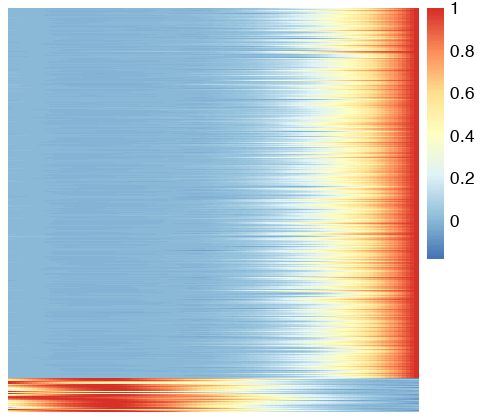

In [62]:
dat.sub.2.scale <- t(apply(dat.sub,1,function(x) x/max(x)))
pk.scale<- pamk(dat.sub.2.scale,critout=T)
table(pk.scale$pamobject$clustering)
pheatmap(dat.sub.2.scale[order(pk.scale$pamobject$clustering),],scale="none",cluster_rows = F,cluster_cols = F,
         show_rownames = F,show_colnames = F)

2  clusters  0.615 
3  clusters  0.334 
4  clusters  0.304 
5  clusters  0.282 
6  clusters  0.265 
7  clusters  0.28 
8  clusters  0.265 
9  clusters  0.265 
10  clusters  0.264 



  1   2 
159  30 

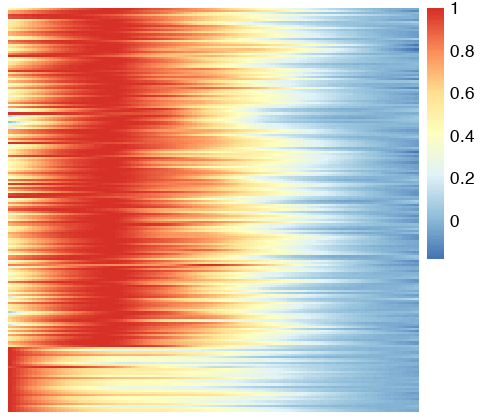

In [63]:
dat.sub.2.scale <- dat.sub.2.scale[pk.scale$pamobject$clustering==2,]
pk.scale<- pamk(dat.sub.2.scale,critout=T)
table(pk.scale$pamobject$clustering)
pheatmap(dat.sub.2.scale[order(pk.scale$pamobject$clustering),],scale="none",cluster_rows = F,cluster_cols = F,
         show_rownames = F,show_colnames = F)